# Interpretability

## CNN Visualization

## Sample network and images

### import

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

### model

In [2]:
model = VGG16(weights='imagenet', include_top=True) #Load alredy pre-trained model
model.summary() #Print a list of layers with all the details

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/Machine_Learning/images'

Mounted at /content/drive


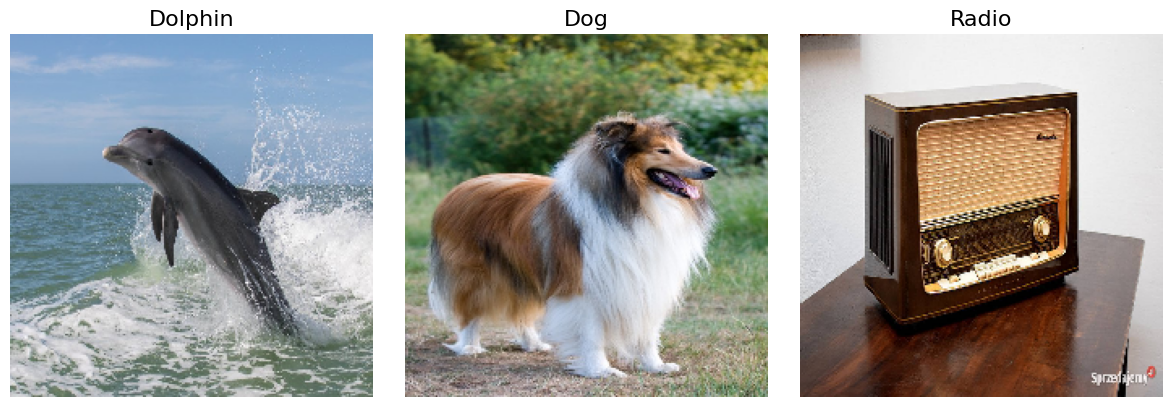

In [4]:
import os

dolphin_path = os.path.join(dataset_path, 'dolphin.jpg')
dog_path = os.path.join(dataset_path, 'rough_colie.jpg')
radio_path = os.path.join(dataset_path, 'stare-radio-lampowe.jpg')

#Further on, each time you will need to complete the code, it will be marked by #TODO

# Assign image titles for your images
image_titles = ['Dolphin', 'Dog', 'Radio']

# Load images and reshape them
img1 = load_img(dolphin_path, target_size=(224, 224))
img2 = load_img(dog_path, target_size=(224, 224))
img3 = load_img(radio_path, target_size=(224, 224))
#We resize the images into size 224 x 224, as the model prefers those sizes. However, if your images are smaller, you can change those values a little bit.

# Convert them to a Numpy array
images = np.asarray([np.array(img1), np.array(img2), np.array(img3)])

# Preparing input data for VGG16
X = preprocess_input(images) #TODO apply preprocessing function specific to VGG network (you have already imported it)

# Rendering
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [5]:
# Predict the output (probabilities) of the layer, corresponding to an image
preds = model.predict(X) #TODO feed images into the network and see the results (use "predict" function)
best_class = np.argmax(preds, axis=1) #TODO find the best class (use argmax or argsort function)


print('Predicted:', decode_predictions(preds, top=3)[0]) #Decode prediction based on Imagenet dataset dictionary. Each umerical class is assigned to a real-life label
print(best_class)
for i in range(3):
  print(decode_predictions(preds, top=3)[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted: [('n02066245', 'grey_whale', 0.34440517), ('n01484850', 'great_white_shark', 0.3304212), ('n02058221', 'albatross', 0.16078325)]
[147 231 754]
[('n02066245', 'grey_whale', 0.34440517), ('n01484850', 'great_white_shark', 0.3304212), ('n02058221', 'albatross', 0.16078325)]
[('n02106030', 'collie', 0.53460646), ('n02105855', 'Shetland_sheepdog', 0.46523577), ('n02086910', 'papillon', 4.2305208e-05)]
[('n04041544', 'radio', 0.6891777), ('n03908714', 'pencil_sharpener', 0.08304033), ('n04265275', 'space_heater', 0.07691248)]


# Visualizing heatmaps

In [6]:
!pip install tf_keras_vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.0 MB/s eta 0:00:00


In [7]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.scorecam import Scorecam
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

In [8]:
def visualise_heatmap(map, images):
  f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
  for i, title in enumerate(image_titles):
      heatmap = np.uint8(cm.jet(map[i])[..., :3] * 255)
      ax[i].set_title(title, fontsize=16)
      ax[i].imshow(images[i])
      ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
      ax[i].axis('off')
  plt.tight_layout()
  plt.show()

## GradCAM

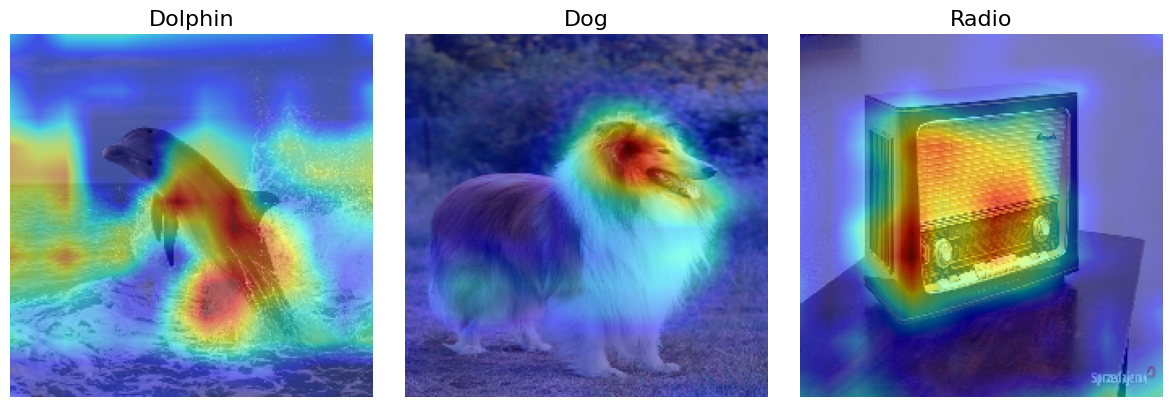

In [9]:
replace2linear = ReplaceToLinear()
score = CategoricalScore(list(best_class))

gradcam = Gradcam(model,
                  model_modifier=replace2linear,
                  clone=True)

cam = gradcam(score,
              X,
              penultimate_layer=-1)

visualise_heatmap(cam, images)

## GradCAM++

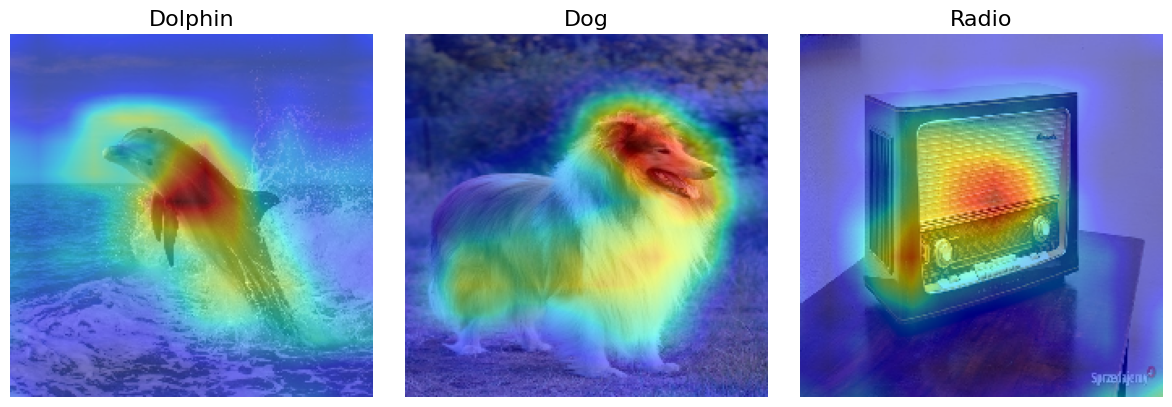

In [10]:
gradcam = GradcamPlusPlus(model,
                          model_modifier=replace2linear,
                          clone=True)

cam = gradcam(score,
              X,
              penultimate_layer=-1)

visualise_heatmap(cam,images)

## ScoreCAM

48/48 ━━━━━━━━━━━━━━━━━━━━ 18s 107ms/step


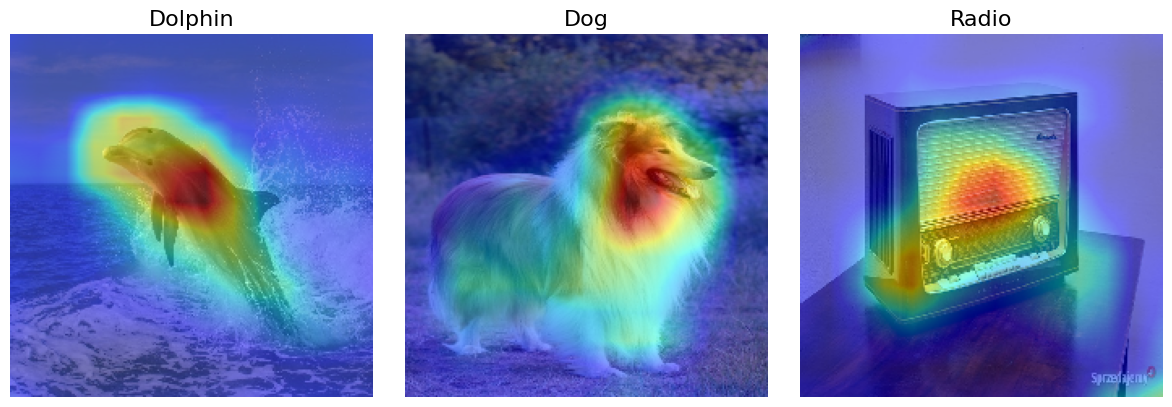

In [11]:
scorecam = Scorecam(model)
cam = scorecam(score, X, penultimate_layer=-1)
visualise_heatmap(cam, images)

## Saliency Maps

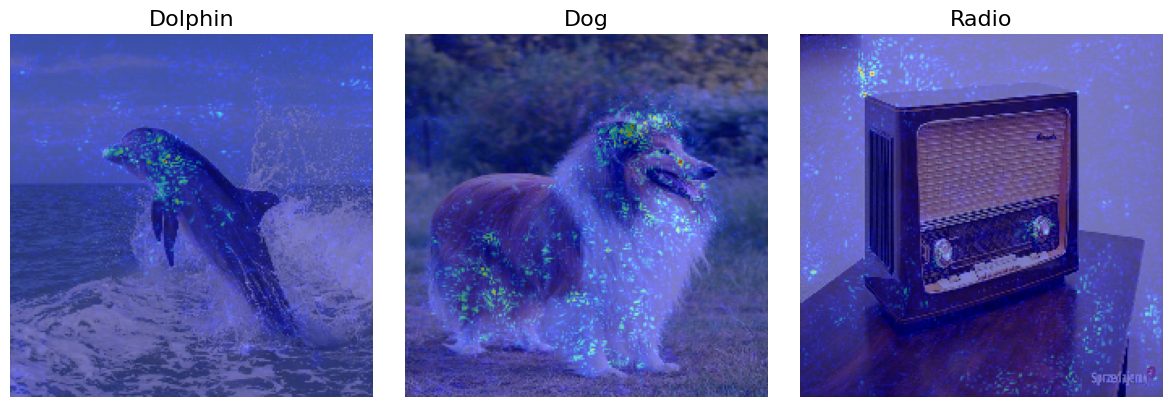

In [13]:
saliency = Saliency(model, model_modifier=replace2linear, clone=True)
saliency_map = saliency(score, X)
visualise_heatmap(saliency_map, images)

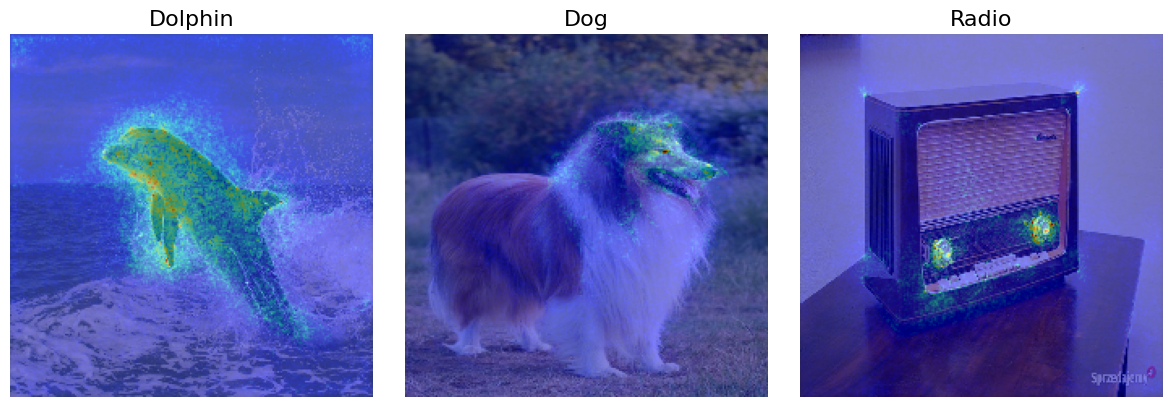

In [14]:
saliency_map = saliency(score, X, smooth_samples=20, smooth_noise=0.20)
visualise_heatmap(saliency_map, images)

## Additional tasks

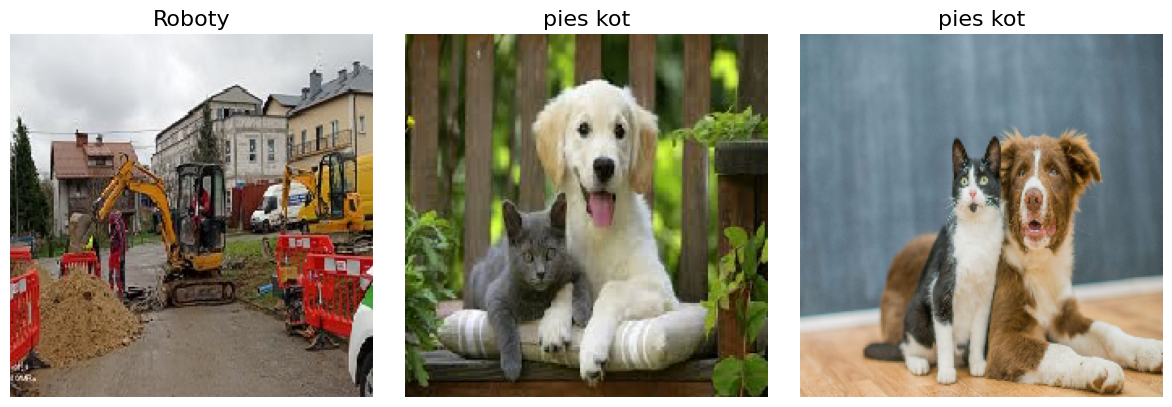

In [22]:
roboty_path = os.path.join(dataset_path, 'wszystko.jpg')
pies_kot_path = os.path.join(dataset_path, 'pies_kot.jpg')
pies_kot_1_path = os.path.join(dataset_path, 'pies_kot_1.jpg')

image_titles_ = ['Roboty', "pies kot", "pies kot"]

img4 = load_img(roboty_path, target_size=(224, 224))
img5 = load_img(pies_kot_path, target_size=(224, 224))
img6 = load_img(pies_kot_1_path, target_size=(224, 224))

images_ = np.asarray([np.array(img4), np.array(img5), np.array(img6)])

# Preparing input data for VGG16
X_ = preprocess_input(images_) #TODO apply preprocessing function specific to VGG network (you have already imported it)

# Rendering
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles_):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images_[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [27]:
# Predict the output (probabilities) of the layer, corresponding to an image
preds_ = model.predict(X_) #TODO feed images into the network and see the results (use "predict" function)
best_class_ = np.argmax(preds_, axis=1) #TODO find the best class (use argmax or argsort function)

print('Predicted:', decode_predictions(preds_, top=7)[0]) #Decode prediction based on Imagenet dataset dictionary. Each umerical class is assigned to a real-life label
print(best_class_)
for i in range(3):
  print(decode_predictions(preds_, top=7)[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted: [('n03384352', 'forklift', 0.19280735), ('n03496892', 'harvester', 0.1698756), ('n03126707', 'crane', 0.15394975), ('n04461696', 'tow_truck', 0.10775083), ('n04428191', 'thresher', 0.090414226), ('n03417042', 'garbage_truck', 0.07697711), ('n04252225', 'snowplow', 0.050283995)]
[561 222 232]
[('n03384352', 'forklift', 0.19280735), ('n03496892', 'harvester', 0.1698756), ('n03126707', 'crane', 0.15394975), ('n04461696', 'tow_truck', 0.10775083), ('n04428191', 'thresher', 0.090414226), ('n03417042', 'garbage_truck', 0.07697711), ('n04252225', 'snowplow', 0.050283995)]
[('n02104029', 'kuvasz', 0.7459102), ('n02111500', 'Great_Pyrenees', 0.102870785), ('n02099601', 'golden_retriever', 0.073686905), ('n02099712', 'Labrador_retriever', 0.018758066), ('n02110063', 'malamute', 0.008563018), ('n02099267', 'flat-coated_retriever', 0.007846776), ('n02108551', 'Tibetan_mastiff', 0.005130141)]
[('n02106166', 'Border_collie', 0.37901813), ('n02106030',

48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step


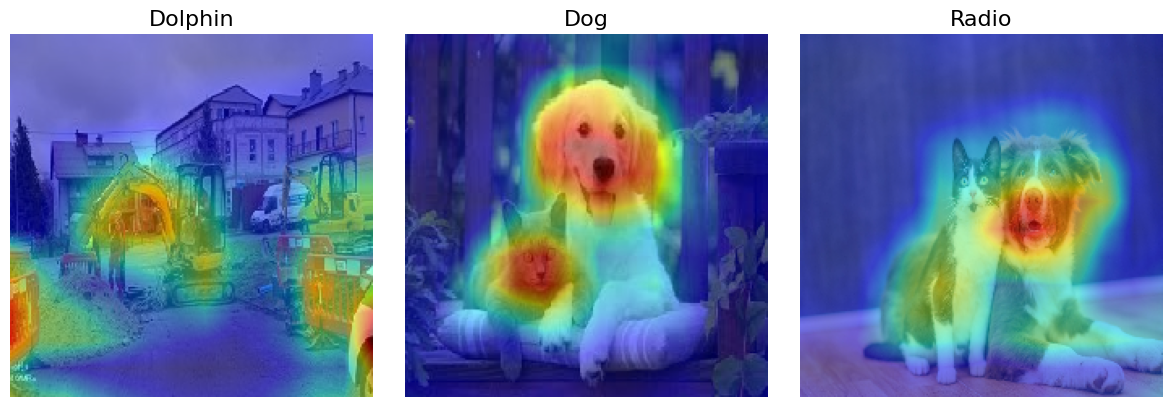

In [26]:
score_ = CategoricalScore(list(best_class_))

scorecam = Scorecam(model)
cam = scorecam(score_, X_, penultimate_layer=-1)
visualise_heatmap(cam, images_)

# Visualizing intermediate activations

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
['input_layer', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool', 'flatten', 'fc1', 'fc2']


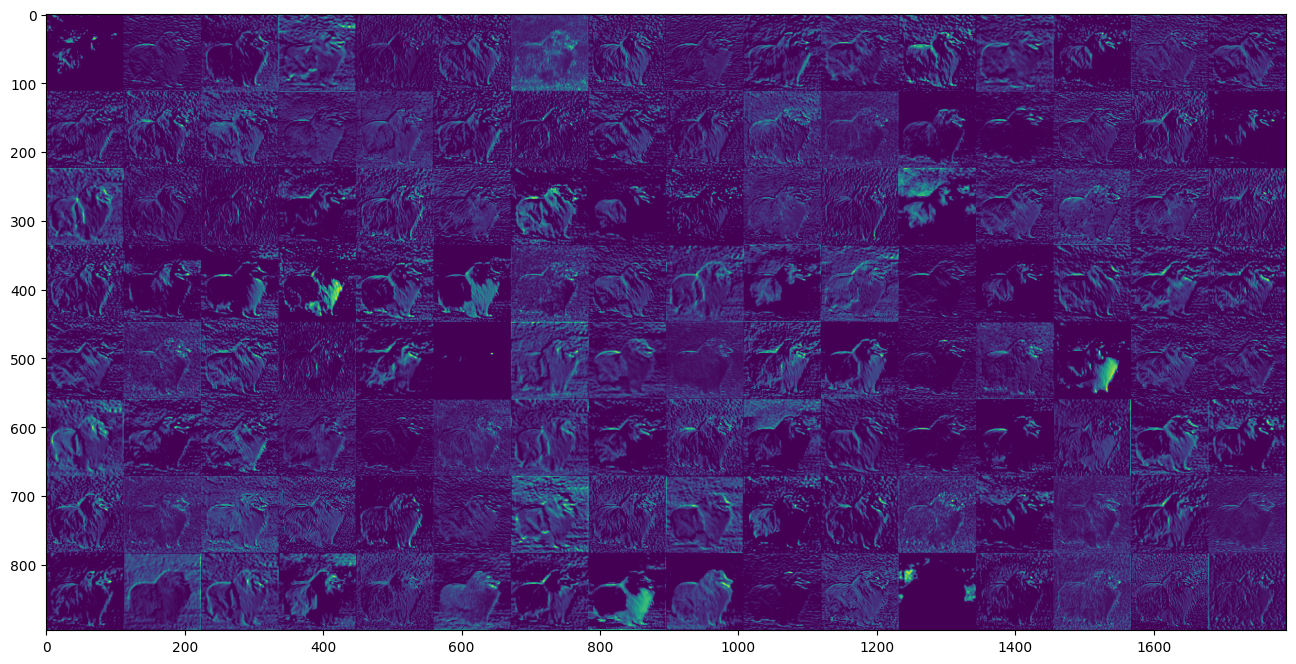

In [40]:
layer_outputs = [layer.output for layer in model.layers] #Loop through the model defined in the beginning to access outputs of individual layers
activation_model = models.Model(model.input, layer_outputs)
X_reshaped = X[1].reshape(1,224,224,3) #TODO take one image and reshape it into size (1,224,224,3)
activations = activation_model.predict(X_reshaped) #TODO use the predict function on the activation model to get the intermediate activations

layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name)

print(layer_names)

images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name == 'block2_conv1': #TODO Specify the name of the layer that you want to see. Choose one name from the model summary we printed in the beginning
        number_of_feature_maps = layer_activation.shape[-1]
        feature_map_shape = layer_activation.shape[1]
        n_cols = number_of_feature_maps // images_per_row
        display_grid = np.zeros((feature_map_shape * n_cols, images_per_row * feature_map_shape))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image /= np.max(channel_image)
                display_grid[col * feature_map_shape : (col + 1) * feature_map_shape, row * feature_map_shape : (row + 1) * feature_map_shape] = channel_image
        scale = 1. / feature_map_shape
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Additional tasks